In [996]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [997]:
# Data gathering or data collection
df = pd.read_csv('https://raw.githubusercontent.com/Basavarajkembhavimath/basavarajkembhavimath.github.io/master/Parkinsons_disease_data')
df.head()

,Unnamed: 0,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [998]:
df.tail()

,Unnamed: 0,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,0.00406,0.01907,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [999]:
df.sex.value_counts()

0    4008
1    1867
Name: sex, dtype: int64

In [1000]:
# Cleaning data
# finding missing values in the dataset
df.isna().sum()

Unnamed: 0       0
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

There is no missing values in the dataset

# Droping columns
### droping first column becouse that is only serial no, and last is moto_updrs becouse that is very less corelative to the data

In [1001]:
df = df.drop(['Unnamed: 0','motor_UPDRS'] , axis = 1)
df.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [1002]:
# Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   total_UPDRS    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    5875 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE    

In [1003]:
df.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

All the features are numerical data there is no object features

In [1004]:
# Getting the complet information about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560
Jitter:DDP,5875.0,0.008962,0.009371,0.000980,0.004730,0.006750,0.009870,0.172630


From the describe method we can find these
1. minimum and maximum
2. mean, mode, median and standerd deviation, percentile of data
3. and also we can find the outliers in the dataset, Based on mean, std, and min max values. 
4. There is large a large difference between 75th%tile and max values of feature is "Test_time".


# EDA Analysis

In [1005]:
corrilation = df.corr()
corrilation

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.253643,0.135448,0.075156,0.120339,0.136474,0.120350,0.146202,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.310290,0.023071,0.035691,0.010255,0.013199,0.010258,0.101554,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.096559,0.051422,-0.154645,0.076718,0.087995,0.076703,0.058736,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,-0.028876,-0.033870,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,0.092141,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,0.649046,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491
Jitter:DDP,0.120350,0.010258,0.076703,-0.028876,0.064027,0.984184,0.844630,1.000000,0.947203,1.000000,0.681734,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660


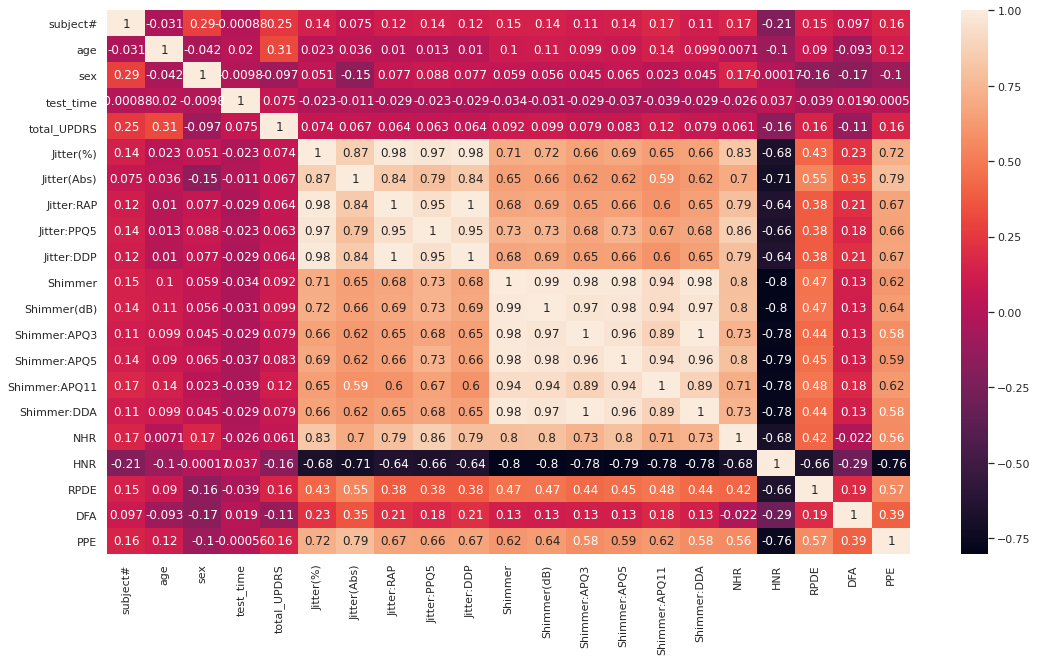

In [1006]:
sns.set(rc={'figure.figsize':(18,10)})
sns.heatmap(corrilation, annot=True)
plt.show()

Relationship is

1. here we can know that all the jitter and shimmers are positively corelated with each other
2. HNR is strong negativy corilated with all the jitter n summer
3. and there is no correlation in subject, age, gender,test_time and totla_updrs the 
4. Test_time is completely no correlation
so when the correlation is zero then there is no linear relationship between these predicters


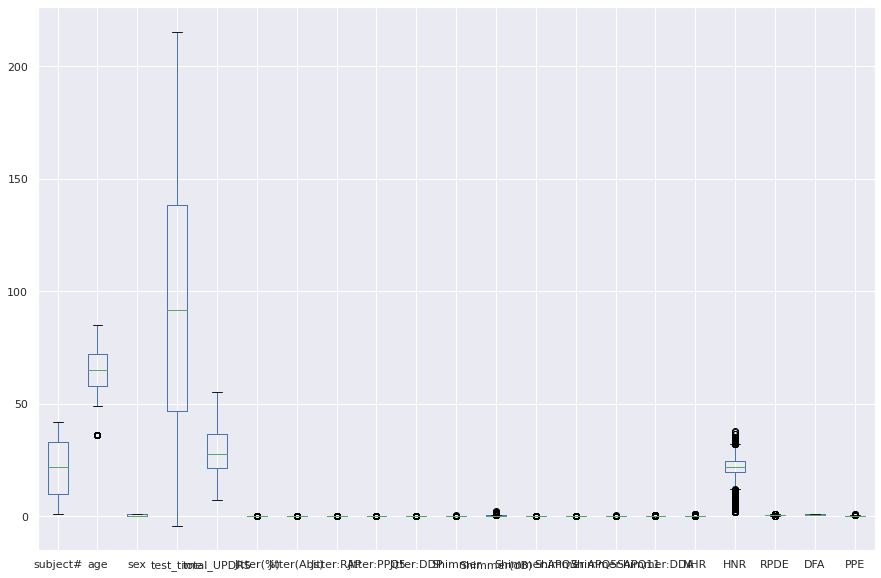

In [1007]:
# finding the outliers in the dataset
df.plot(kind= 'box', figsize=(15,10))

1. From this graph we got to know there are vert few features are having no outliers in the dataset accept 4 features rest of all having the outliers
2. and HNR is having the more outliers in the dataset.

Using IQR
IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle.
An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.
we will use the same dataset

>>Arrange the data in increasing order
>>Calculate first(q1) and third quartile(q3)
>>Find interquartile range (q3-q1)
>>Find lower bound q1*1.5
>>Find upper bound q3*1.5
>>Anything that lies outside of lower and upper bound is an outlier

In [1008]:
# Fist sorting the dataset
age_data = sorted(df.age)

In [1009]:
# Finding first quartile and third quartile
q1, q3= np.percentile(age_data,[25,75])
q1,q3

(58.0, 72.0)

In [1010]:
# Find the IQR which is the difference between third and first quartile
iqr = q3 - q1

In [1011]:
# iqr is 3
# Find lower and upper bound
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
lower_bound, upper_bound

(37.0, 93.0)

In [1012]:
df.age.min(),df.age.max()

(36, 85)

In [1013]:
# Fist sorting the dataset
age_data = sorted(df.Shimmer)
# Finding first quartile and third quartile
q1, q3= np.percentile(age_data,[25,75])
q1,q3

(0.019119999999999998, 0.039749999999999994)

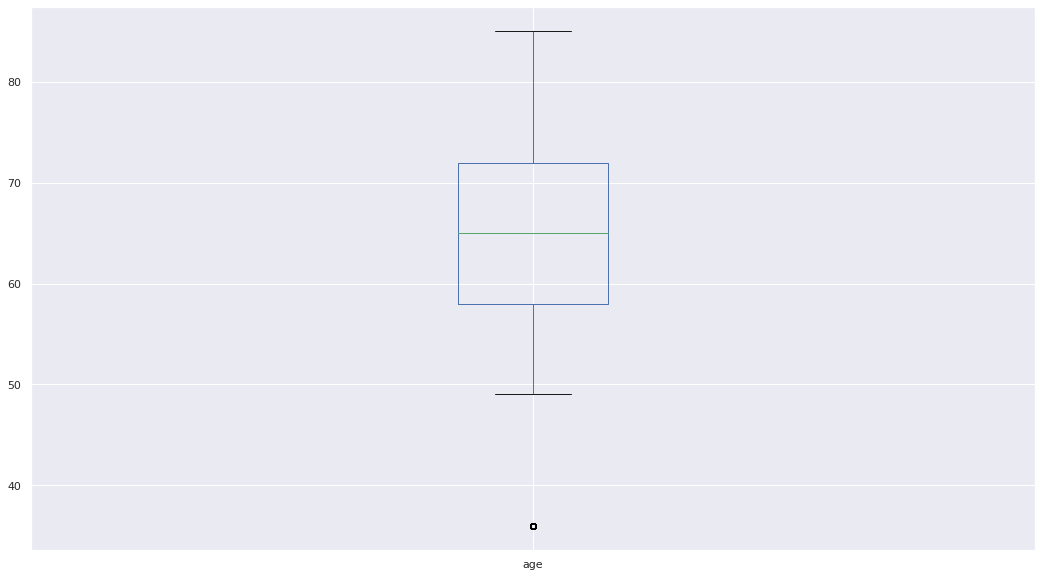

In [1014]:
# first outlier feature
df.age.plot(kind = 'box')

In [1015]:
df.age.max(), df.age.min()

(85, 36)

In [1016]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560
Jitter:DDP,5875.0,0.008962,0.009371,0.000980,0.004730,0.006750,0.009870,0.172630


In [1017]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

subject#         23.000000
age              14.000000
sex               1.000000
test_time        91.597500
total_UPDRS      15.028000
Jitter(%)         0.003220
Jitter(Abs)       0.000031
Jitter:RAP        0.001710
Jitter:PPQ5       0.001640
Jitter:DDP        0.005140
Shimmer           0.020630
Shimmer(dB)       0.190000
Shimmer:APQ3      0.011295
Shimmer:APQ5      0.012965
Shimmer:APQ11     0.017050
Shimmer:DDA       0.033905
NHR               0.020508
HNR               5.038000
RPDE              0.144260
DFA               0.115155
PPE               0.108150
dtype: float64


In [1018]:
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR)
lower_bound, upper_bound

(subject#         -34.480880
 age              -20.980880
 sex               -1.480880
 test_time       -137.377130
 total_UPDRS      -22.522880
 Jitter(%)          0.014290
 Jitter(Abs)        0.019074
 Jitter:RAP         0.016555
 Jitter:PPQ5        0.016660
 Jitter:DDP         0.011410
 Shimmer           -0.011825
 Shimmer(dB)       -0.265880
 Shimmer:APQ3       0.002177
 Shimmer:APQ5      -0.000328
 Shimmer:APQ11     -0.006455
 Shimmer:DDA       -0.031738
 NHR               -0.011642
 HNR               -7.537880
 RPDE              -0.197270
 DFA               -0.153613
 PPE               -0.143105
 dtype: float64, subject#          34.539750
 age               21.039750
 sex                1.539750
 test_time        137.436000
 total_UPDRS       22.581750
 Jitter(%)          0.044580
 Jitter(Abs)        0.039796
 Jitter:RAP         0.042315
 Jitter:PPQ5        0.042210
 Jitter:DDP         0.047460
 Shimmer            0.070695
 Shimmer(dB)        0.324750
 Shimmer:APQ3       0.05669

In [1019]:
x = pd.DataFrame(6+np.log(df.Shimmer))
#x.clip(upper=pd.Series({"Shimmer":4}),axis = 1).max()

In [1020]:
Q1 = x.Shimmer.quantile(0.25)
Q3 = x.Shimmer.quantile(0.75)
IQR = Q3 - Q1
IQR

0.7318750386038504

In [1021]:
Q1,Q3

(2.0429794918700344, 2.7748545304738848)

In [1022]:
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)
lower_bound, upper_bound

(0.9451669339642588, 3.8726670883796603)

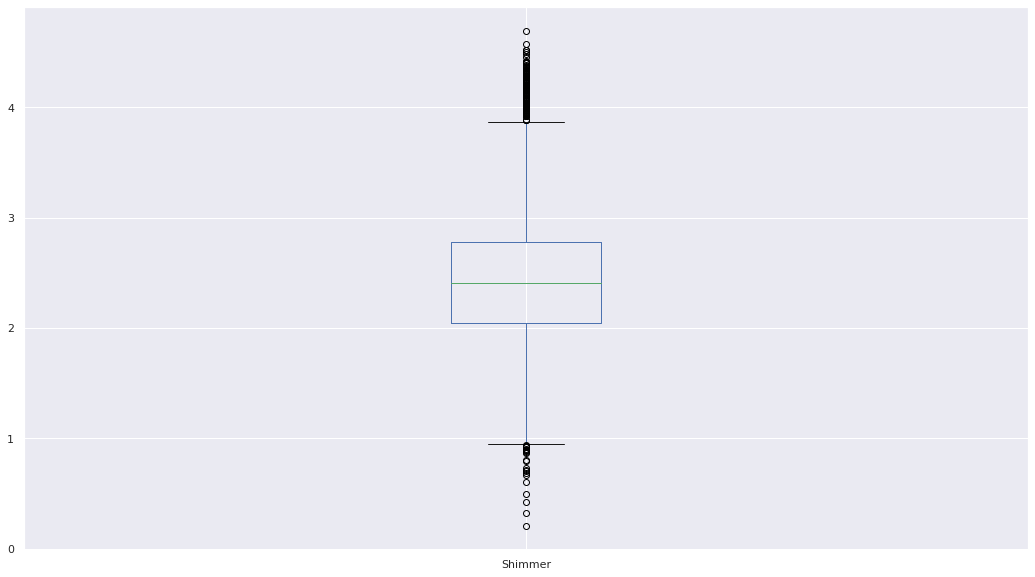

In [1023]:
x.Shimmer.plot(kind = "box")

In [1024]:
x.describe()

,Shimmer
count,5875.000000
mean,2.436168
std,0.575363
min,0.210660
25%,2.042979
50%,2.406794
75%,2.774855
max,4.685580


In [1025]:
x.Shimmer = x.clip(upper=pd.Series({"Shimmer":3.872667}),axis = 1)
x.Shimmer = x.clip(lower=pd.Series({"Shimmer":0.945167}),axis = 1)

In [1026]:
#x.Shimmer = x.clip(upper=pd.Series({"Shimmer":4}),axis = 1)
#x.Shimmer = x.clip(lower=pd.Series({"Shimmer":2.43}),axis = 1)

In [1027]:
x.describe()

,Shimmer
count,5875.000000
mean,2.430762
std,0.555109
min,0.945167
25%,2.042979
50%,2.406794
75%,2.774855
max,3.872667


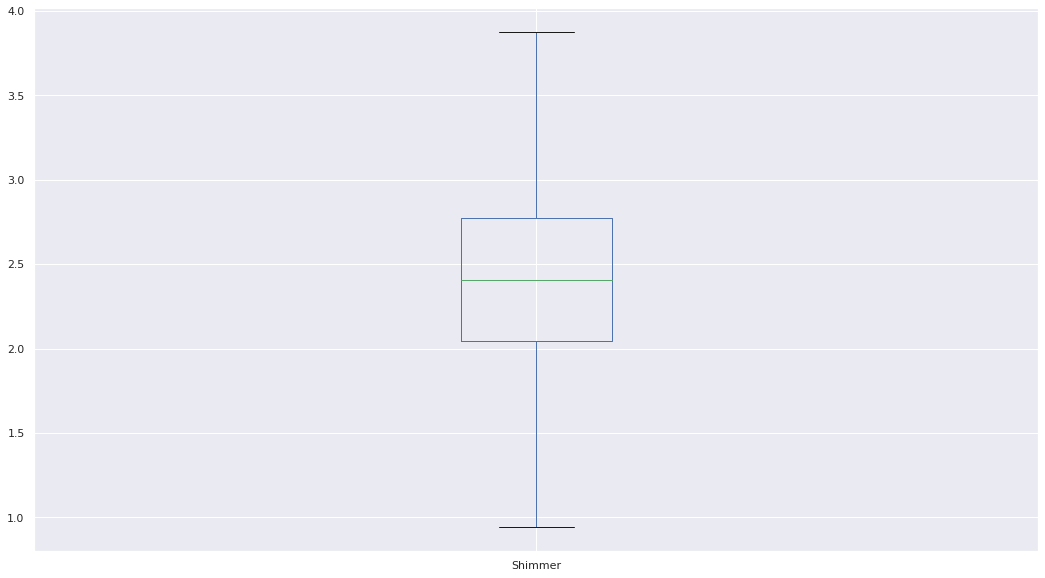

In [1028]:
df["Shimmer"] = x.Shimmer
x.Shimmer.plot(kind = "box")

Text(0.5, 0.98, '3 rows x 4 columns axes with no data')

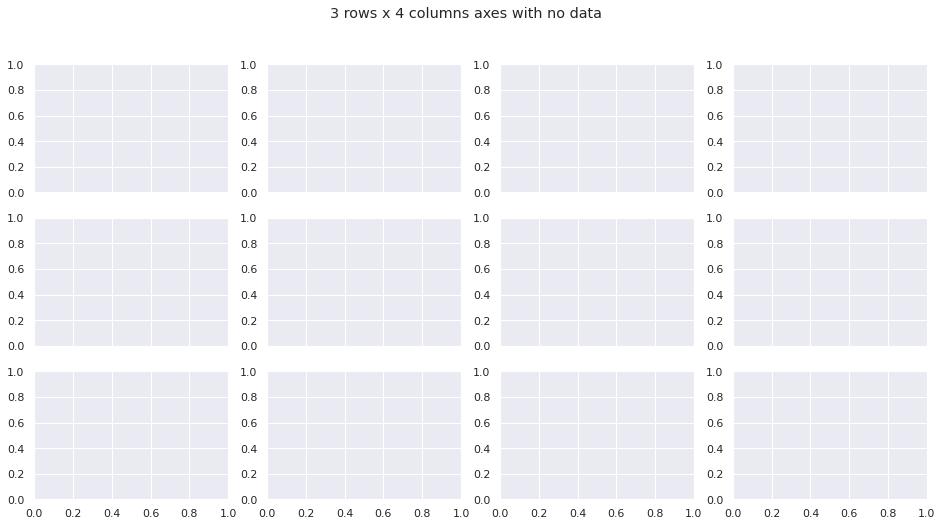

In [1029]:
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
fig.suptitle('3 rows x 4 columns axes with no data')

In [1030]:
len(df.columns)


21

In [1031]:
df.age

0       72
1       72
2       72
3       72
4       72
        ..
5870    61
5871    61
5872    61
5873    61
5874    61
Name: age, Length: 5875, dtype: int64

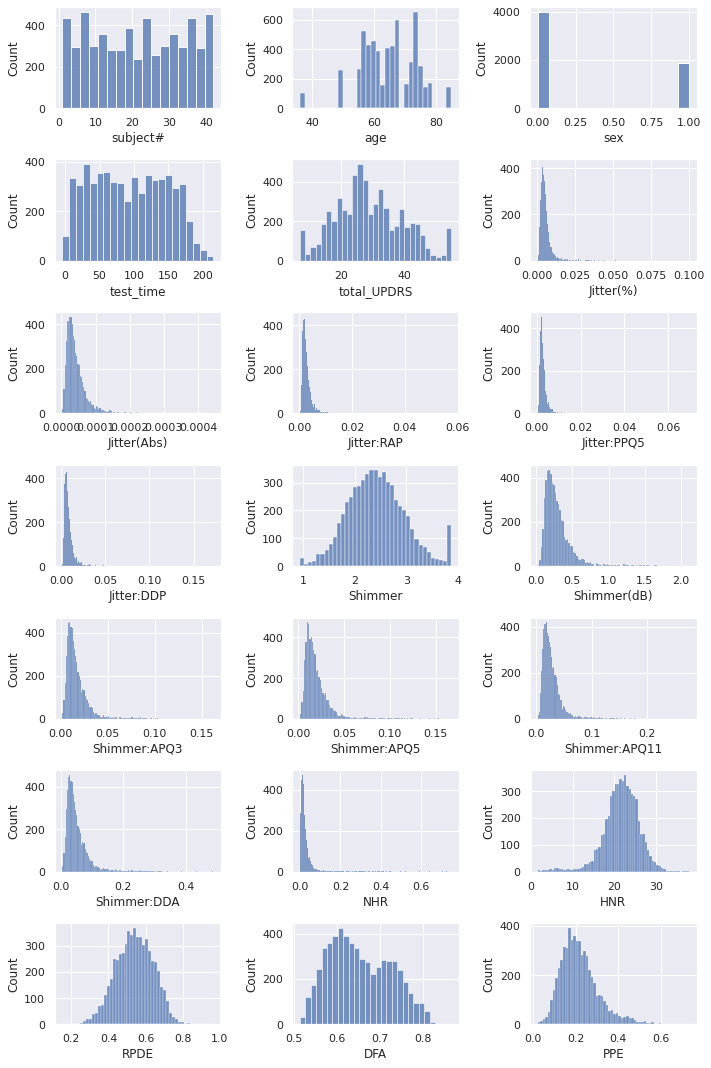

In [1032]:
fig=plt.figure(figsize=(10,15))
rows = 7
columns = 3
for idx,col in enumerate(df.columns, start= 1):
  ax = fig.add_subplot(rows, columns, idx)
  sns.histplot(data=df, x = col,ax= ax)
  #df[col].plot(kind = "hist",label= col)
plt.tight_layout()

In [1033]:
# all Jitter and all shimmer and nhr
#jitter_col = df.columns
quant = {}
def qantail():
  for i in df.columns[5:17]:
    x = pd.DataFrame(6+np.log(df[i]))
    Q1 = x[i].quantile(0.25)
    Q3 = x[iter].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR) 
    upper_bound = Q3 +(1.5 * IQR)
    quant[i]=[lower_bound,upper_bound]

qantail()

In [1034]:
quant


{'Jitter(%)': [Jitter(%)   -0.594732
  Name: 0.75, dtype: float64, Jitter(%)    1.971507
  Name: 0.75, dtype: float64], 'Jitter(Abs)': [Jitter(Abs)   -6.003844
  Name: 0.75, dtype: float64, Jitter(Abs)   -2.539962
  Name: 0.75, dtype: float64], 'Jitter:DDP': [Jitter:DDP   -0.457192
  Name: 0.75, dtype: float64, Jitter:DDP    2.485107
  Name: 0.75, dtype: float64], 'Jitter:PPQ5': [Jitter:PPQ5   -1.272567
  Name: 0.75, dtype: float64, Jitter:PPQ5    1.297161
  Name: 0.75, dtype: float64], 'Jitter:RAP': [Jitter:RAP   -1.550525
  Name: 0.75, dtype: float64, Jitter:RAP    1.383326
  Name: 0.75, dtype: float64], 'NHR': [NHR   -0.096484
  Name: 0.75, dtype: float64, NHR    4.123581
  Name: 0.75, dtype: float64], 'Shimmer': [Shimmer    6.255126
  Name: 0.75, dtype: float64, Shimmer    7.479882
  Name: 0.75, dtype: float64], 'Shimmer(dB)': [Shimmer(dB)    3.154364
  Name: 0.75, dtype: float64, Shimmer(dB)    6.094809
  Name: 0.75, dtype: float64], 'Shimmer:APQ11': [Shimmer:APQ11    0.739066
  N

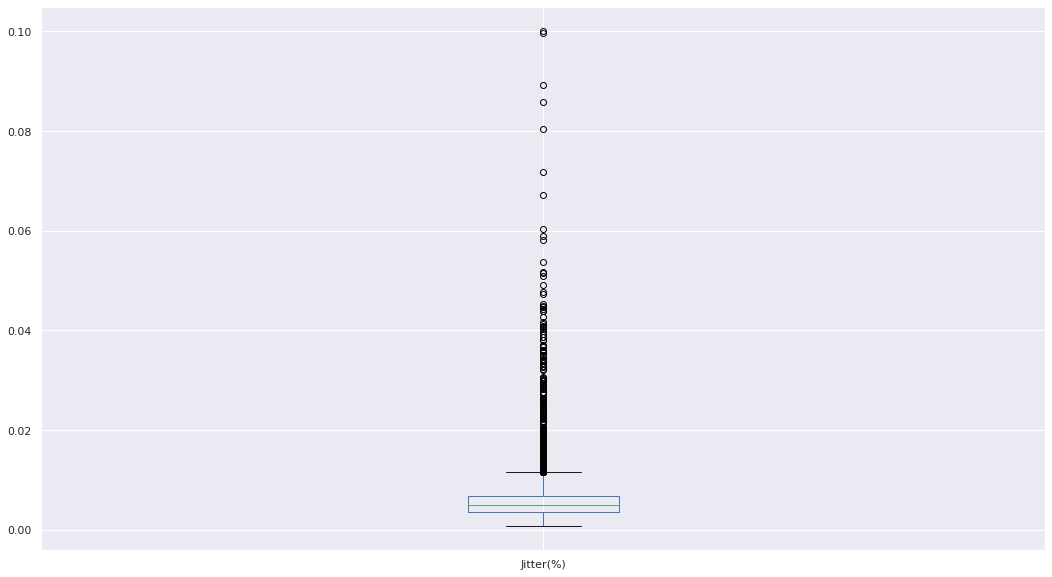

In [1035]:
df["Jitter(%)"].plot(kind ="box")

In [1036]:
x = pd.DataFrame(6+np.log(df['Jitter(%)']))
#x.clip(upper=pd.Series({"Shimmer":4}),axis = 1).max()

In [1037]:
x['Jitter(%)'] = x.clip(upper=pd.Series({"Jitter(%)":1.971507}),axis = 1)
x['Jitter(%)'] = x.clip(lower=pd.Series({"Jitter(%)":-0.594732}),axis = 1)

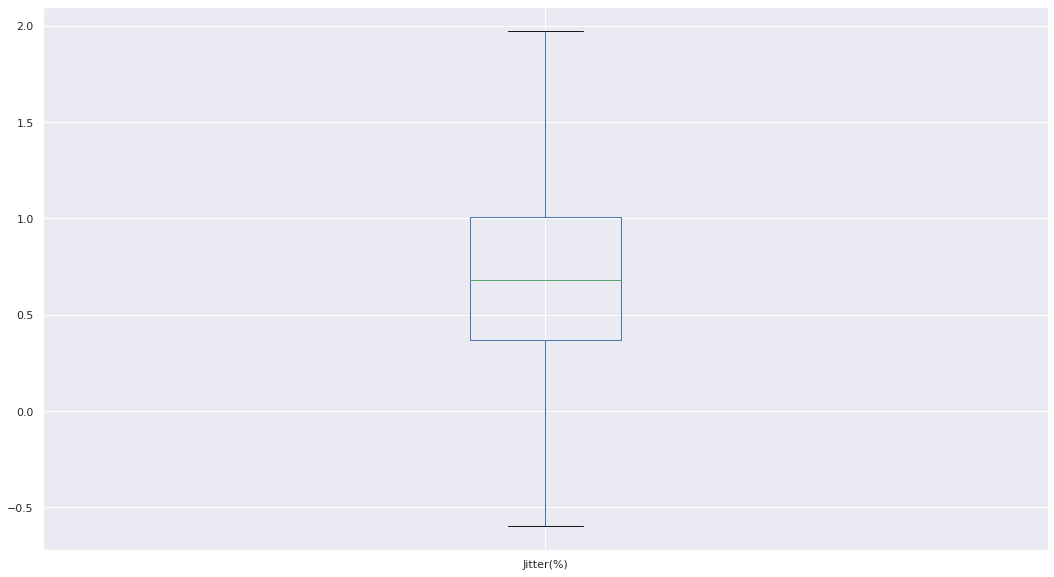

In [1038]:
df["Jitter(%)"] = x['Jitter(%)']
x['Jitter(%)'].plot(kind = "box")

In [1039]:
class quantel:
  def __init__(self,data,name,low,upp):
    self.data = data
    self.name = name
    self.low = low
    self.upp = upp

  def up_low(self):
    x = pd.DataFrame(6+np.log(df[self.name]))
    x[self.name] = x.clip(upper=pd.Series({self.name:self.upp}),axis = 1)
    x[self.name] = x.clip(lower=pd.Series({self.name:self.low}),axis = 1)
    self.data[self.name] = x[self.name]

  #def lower(self):
    #x = pd.DataFrame(6+np.log(df[self.name]))
    #x[self.name] = x.clip(lower=pd.Series({self.name:self.low}),axis = 1)
    #self.data[self.name] = x[self.name]
    #return x[self.name].plot(kind = "box")

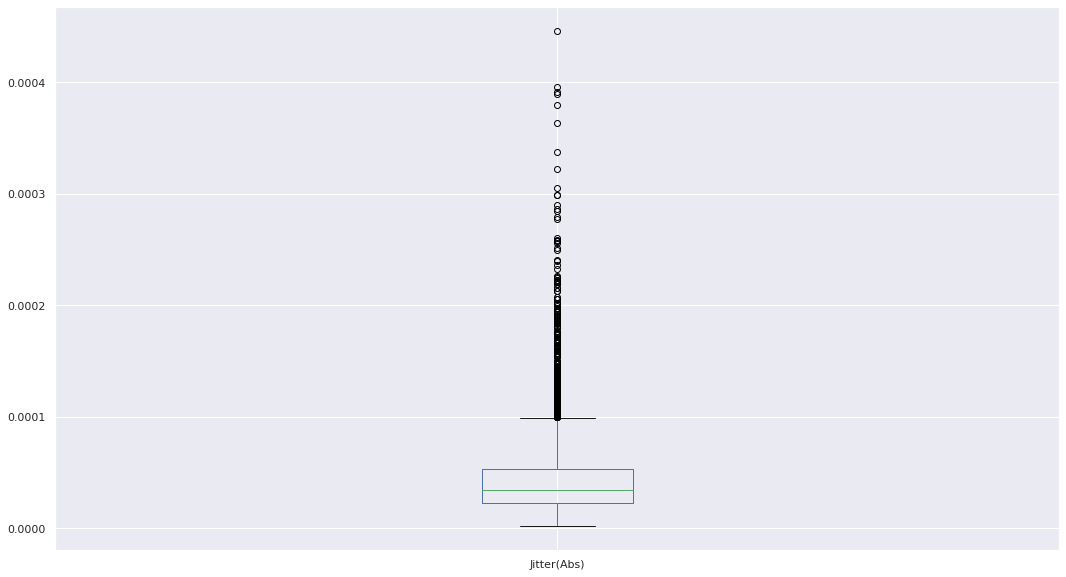

In [1040]:
df["Jitter(Abs)"].plot(kind = 'box')

In [1041]:
df['Jitter(Abs)'].describe()

count    5875.000000
mean        0.000044
std         0.000036
min         0.000002
25%         0.000022
50%         0.000035
75%         0.000053
max         0.000446
Name: Jitter(Abs), dtype: float64

In [1042]:
qup = quantel(df,'Jitter(Abs)',-6.003844 ,-2.539962)
qup.up_low()

In [1043]:
df['Jitter(Abs)'].describe()

count    5875.000000
mean       -4.264513
std         0.659558
min        -6.003844
25%        -4.704888
50%        -4.273682
75%        -3.838918
max        -2.539962
Name: Jitter(Abs), dtype: float64

In [1044]:
#qup = quantel(df,'Jitter(Abs)',-6.003844 ,-2.539962)
#qup.lower()

In [1045]:
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'total_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [1046]:
quant['Jitter:DDP'][0]

Jitter:DDP   -0.457192
Name: 0.75, dtype: float64

In [1047]:
df['Jitter:DDP'].describe()

count    5875.000000
mean        0.008962
std         0.009371
min         0.000980
25%         0.004730
50%         0.006750
75%         0.009870
max         0.172630
Name: Jitter:DDP, dtype: float64

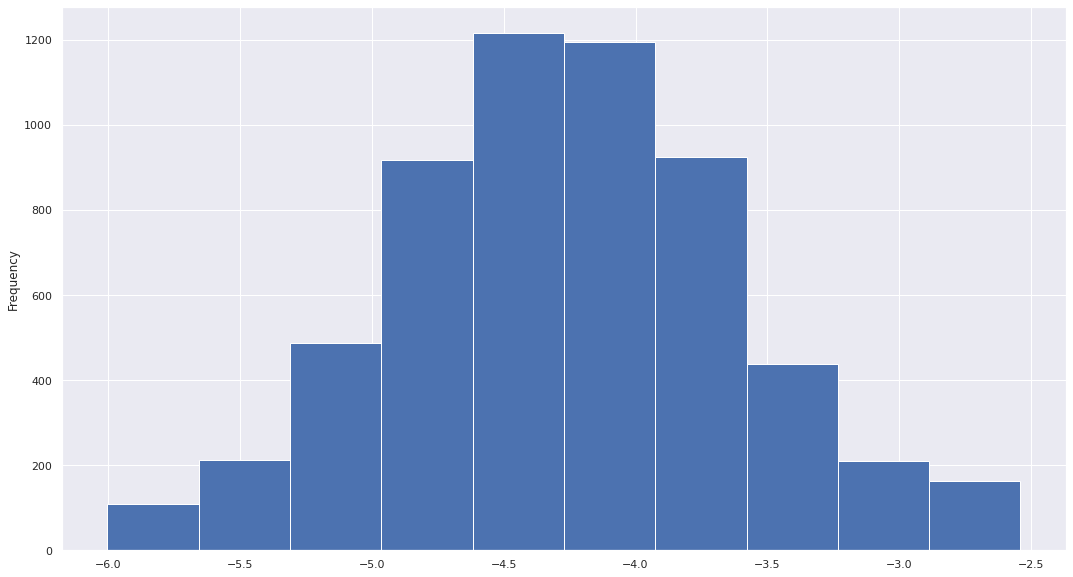

In [1048]:
df['Jitter(Abs)'].plot(kind = "hist")

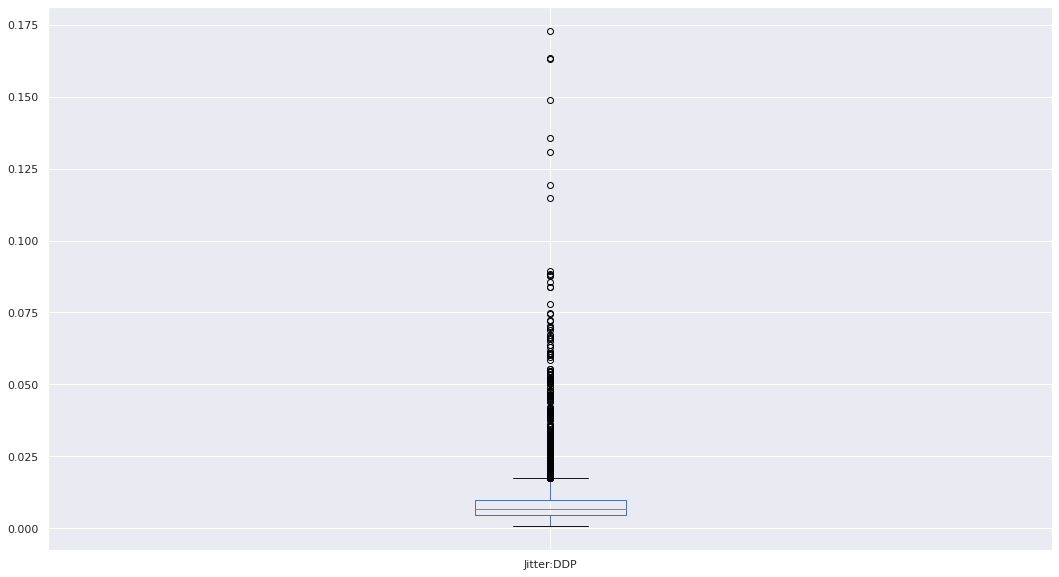

In [1049]:
df['Jitter:DDP'].plot(kind = 'box')

In [1050]:
"""
col = df.columns.to_list()
def get_all_quant():
  for i in col[7:17]:
    low = quant[i][0]
    upp = quant[i][1]

    qup = quantel(df,i,low ,upp)
    qup.up_low()
get_all_quant()
"""

'\ncol = df.columns.to_list()\ndef get_all_quant():\n  for i in col[7:17]:\n    low = quant[i][0]\n    upp = quant[i][1]\n\n    qup = quantel(df,i,low ,upp)\n    qup.up_low()\nget_all_quant()\n'

In [1051]:
quant

{'Jitter(%)': [Jitter(%)   -0.594732
  Name: 0.75, dtype: float64, Jitter(%)    1.971507
  Name: 0.75, dtype: float64], 'Jitter(Abs)': [Jitter(Abs)   -6.003844
  Name: 0.75, dtype: float64, Jitter(Abs)   -2.539962
  Name: 0.75, dtype: float64], 'Jitter:DDP': [Jitter:DDP   -0.457192
  Name: 0.75, dtype: float64, Jitter:DDP    2.485107
  Name: 0.75, dtype: float64], 'Jitter:PPQ5': [Jitter:PPQ5   -1.272567
  Name: 0.75, dtype: float64, Jitter:PPQ5    1.297161
  Name: 0.75, dtype: float64], 'Jitter:RAP': [Jitter:RAP   -1.550525
  Name: 0.75, dtype: float64, Jitter:RAP    1.383326
  Name: 0.75, dtype: float64], 'NHR': [NHR   -0.096484
  Name: 0.75, dtype: float64, NHR    4.123581
  Name: 0.75, dtype: float64], 'Shimmer': [Shimmer    6.255126
  Name: 0.75, dtype: float64, Shimmer    7.479882
  Name: 0.75, dtype: float64], 'Shimmer(dB)': [Shimmer(dB)    3.154364
  Name: 0.75, dtype: float64, Shimmer(dB)    6.094809
  Name: 0.75, dtype: float64], 'Shimmer:APQ11': [Shimmer:APQ11    0.739066
  N

In [1052]:
qup = quantel(df,'Jitter:DDP',-0.457192,2.485107)
qup.up_low()

In [1053]:
qup = quantel(df,'Jitter:PPQ5',-1.272567,1.297161)
qup.up_low()

In [1054]:
qup = quantel(df,'Jitter:RAP', -1.550525, 1.383326)
qup.up_low()

In [1055]:
qup = quantel(df,'NHR', -0.096484, 4.123581) #c
qup.up_low()

In [1056]:
qup = quantel(df,'Shimmer(dB)', 3.154364, 6.094809)
qup.up_low()

In [1057]:
qup = quantel(df,'Shimmer:APQ11', 0.739066, 3.684686)
qup.up_low()

In [1058]:
qup = quantel(df,'Shimmer:APQ3', 0.125784, 3.310644)
qup.up_low()

In [1059]:
qup = quantel(df,'Shimmer:APQ5', 0.287105, 3.443798)
qup.up_low()

In [1060]:
qup = quantel(df,'Shimmer:DDA', 1.223255, 4.4102)
qup.up_low()

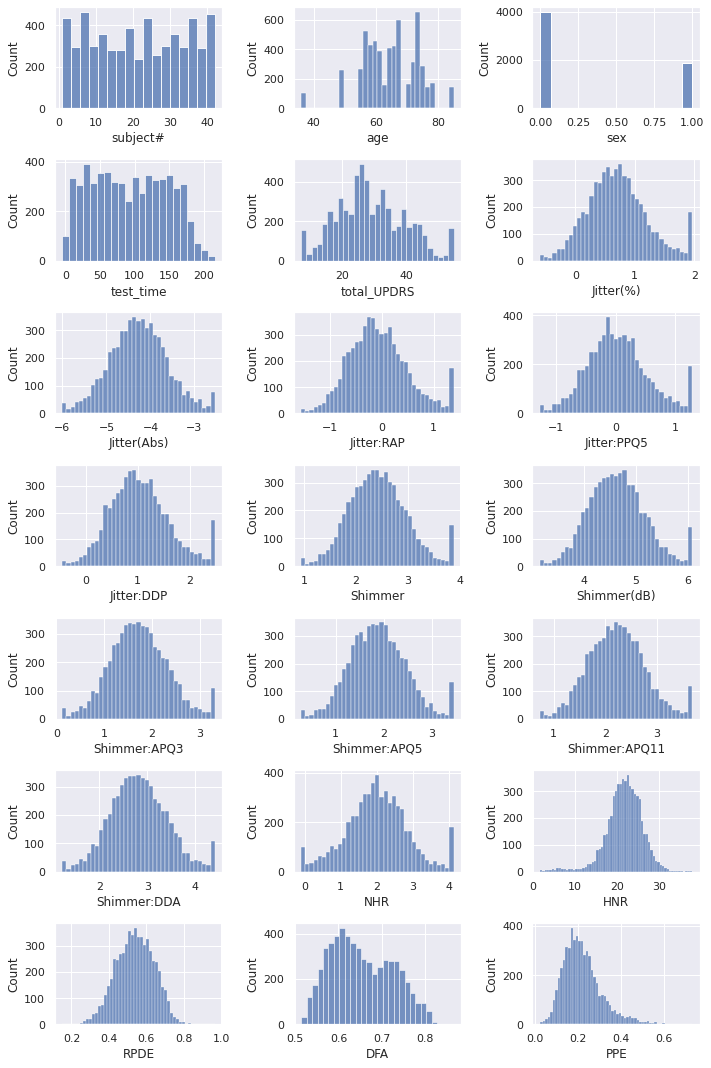

In [1061]:
fig=plt.figure(figsize=(10,15))
rows = 7
columns = 3
for idx,col in enumerate(df.columns, start= 1):
  ax = fig.add_subplot(rows, columns, idx)
  sns.histplot(data=df, x = col,ax= ax)
  #df[col].plot(kind = "hist",label= col)
plt.tight_layout()

In [1062]:
df.describe()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,29.018942,0.710541,-4.264513,-0.054764,0.038428,1.043937,2.430762,4.647073,1.728577,1.882424,2.226447,2.827194,2.012092,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,10.700283,0.507153,0.659558,0.571087,0.517086,0.571319,0.555109,0.554693,0.605546,0.592606,0.555814,0.605597,0.864278,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,7.000000,-0.594732,-6.003844,-1.550525,-1.272567,-0.457192,0.945167,3.154364,0.125784,0.287105,0.739066,1.223255,-0.096484,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,21.371000,0.367608,-4.704888,-0.450330,-0.308919,0.646170,2.042979,4.257031,1.320106,1.470865,1.843674,2.418359,1.486041,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,27.576000,0.681480,-4.273682,-0.096825,0.004527,1.001787,2.406794,4.625634,1.709641,1.861076,2.215050,2.808496,2.007201,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,36.399000,1.009167,-3.838918,0.283132,0.333513,1.381745,2.774855,4.992142,2.116321,2.260038,2.580078,3.215096,2.541057,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,54.992000,1.971507,-2.539962,1.383326,1.297161,2.485107,3.872667,6.094809,3.310644,3.443798,3.684686,4.410200,4.123581,37.875000,0.966080,0.865600,0.731730


In [1063]:
df2 = df
df2.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,34.398,0.982340,-4.295050,0.481036,0.245976,1.580479,2.336788,4.530324,1.758083,1.664093,1.902852,2.856695,1.751805,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,34.894,0.190857,-4.994132,-0.630124,-0.502290,0.465960,2.099906,4.279631,1.388812,1.464356,1.918966,2.487424,1.500270,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,35.389,0.662942,-4.611951,-0.189915,-0.175387,0.910321,1.910643,4.290742,1.085584,1.225227,1.771895,2.184196,2.098917,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,35.810,0.756171,-4.535728,-0.260652,0.063024,0.837960,2.231644,4.882205,1.495580,1.629902,2.069304,2.593891,2.418611,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,36.375,0.301205,-4.812803,-0.980326,-0.645391,0.114696,1.927221,4.262729,1.007696,1.321183,1.993117,2.105817,1.545403,26.126,0.47188,0.56122,0.19361


# Extracting Train dataset and Test dataset

Separate out independent and target variables

In [1064]:
# Defining the target target variable and dependent variables
X = df2.drop('total_UPDRS', axis=1)
y = df2.loc[:, 'total_UPDRS']
X

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,0.982340,-4.295050,0.481036,0.245976,1.580479,2.336788,4.530324,1.758083,1.664093,1.902852,2.856695,1.751805,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,0.190857,-4.994132,-0.630124,-0.502290,0.465960,2.099906,4.279631,1.388812,1.464356,1.918966,2.487424,1.500270,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,0.662942,-4.611951,-0.189915,-0.175387,0.910321,1.910643,4.290742,1.085584,1.225227,1.771895,2.184196,2.098917,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,0.756171,-4.535728,-0.260652,0.063024,0.837960,2.231644,4.882205,1.495580,1.629902,2.069304,2.593891,2.418611,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,0.301205,-4.812803,-0.980326,-0.645391,0.114696,1.927221,4.262729,1.007696,1.321183,1.993117,2.105817,1.545403,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,0.493428,-4.377339,-0.394932,-0.388961,0.701683,2.034576,4.167419,1.367459,1.519699,1.832439,2.466413,2.316586,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,0.180807,-4.609112,-0.733802,-0.522493,0.367608,2.234240,4.462883,1.445523,1.639343,2.038787,2.544452,1.571049,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,0.342146,-4.608707,-0.489045,-0.281817,0.609567,2.310720,4.589413,1.710370,1.770523,2.024505,2.808739,1.965866,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,0.125429,-4.802921,-0.660895,-0.495646,0.435110,1.789571,3.967442,1.028105,1.255568,1.662564,2.126236,1.169684,24.422,0.56865,0.56327,0.14204


In [1065]:
y

0       34.398
1       34.894
2       35.389
3       35.810
4       36.375
         ...  
5870    33.485
5871    32.988
5872    32.495
5873    32.007
5874    31.513
Name: total_UPDRS, Length: 5875, dtype: float64

In [1066]:
X.shape,y.shape

((5875, 20), (5875,))

Importing the sklearn model to build a best fit model

In [1067]:
#importing the Linear Regression model
from sklearn.linear_model import LinearRegression

In [1068]:

from sklearn.model_selection import train_test_split

spliting the dataset into train and test with 25% of data in test and 75% in train

In [1069]:
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
test_size = 0.25,
random_state = 1234
)

In [1070]:
X_train.shape, y_train.shape

((4406, 20), (4406,))

In [1071]:
X_test.shape, y_test.shape

((1469, 20), (1469,))

Creating Baseline model

In [1072]:
y_base_learnt = np.mean(y_train)
y_base_learnt

29.134453540626442

In [1073]:
y_base_learnt = np.array([y_base_learnt] * len(y_train)).reshape(-1, 1)
y_base_learnt[:5]

array([[29.13445354],
       [29.13445354],
       [29.13445354],
       [29.13445354],
       [29.13445354]])

In [1074]:
y_base_pred = np.array([np.mean(y_test)] * len(y_test)).reshape(-1, 1)
y_base_pred[:5]

array([[28.67248713],
       [28.67248713],
       [28.67248713],
       [28.67248713],
       [28.67248713]])

Calculating rmse

In [1075]:
from sklearn.metrics import mean_squared_error as mse

In [1076]:
rmse = lambda actual, pred : np.sqrt(mse(actual,pred))
rmse

<function __main__.<lambda>>

In [1077]:
rmse_base = rmse(y_train, y_base_learnt)
rmse_base

10.747983422047515

In [1078]:
y_base_pred = np.array([np.mean(y_test)] * len(y_test)).reshape(-1, 1)
y_base_pred[:5]

array([[28.67248713],
       [28.67248713],
       [28.67248713],
       [28.67248713],
       [28.67248713]])

In [1079]:
rmse_test_base = rmse(y_test, y_base_pred)
rmse_test_base

10.544643574276346

In [1080]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1081]:
c = lr_model.intercept_
c

1088.5477735345971

In [1082]:
m = lr_model.coef_
m

array([ 2.61278210e-01,  3.46747493e-01, -6.16540949e+00,  1.33240581e-02,
        2.16267848e-01, -3.86240896e+00, -1.46740694e+01,  1.64444619e+00,
        1.84887792e+01,  3.40747227e-01, -7.34880151e-01,  9.88692738e+02,
       -2.25465494e+00,  2.69603311e+00, -9.90444616e+02, -1.22640851e+00,
       -5.02019823e-01,  5.73887876e+00, -3.44994584e+01,  5.31098645e+00])

Linear regression model

In [1083]:
lr_model_mfhot = LinearRegression()
lr_model_mfhot.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1084]:
y_learnt = lr_model_mfhot.predict(X_train)
y_learnt

array([24.37840951, 29.39943974, 30.04078188, ..., 27.97960466,
       27.9277834 , 35.39025164])

In [1085]:
y_pred = lr_model_mfhot.predict(X_test)
y_pred

array([29.48284611, 29.18144245, 30.78226928, ..., 37.46555246,
       27.64435518, 22.69397113])

In [1086]:
from sklearn.metrics import mean_squared_error as mse

In [1087]:
rmse = lambda actual,pred : np.sqrt(mse(actual, pred))

In [1088]:
rmse_train = rmse(y_train, y_learnt)
rmse_test  = rmse(y_test, y_pred)

rmse_train, rmse_test

(9.296776572962562, 9.153439509250742)

In [1089]:
from sklearn.metrics import r2_score

In [1090]:
r2_scores = r2_score(y_test, y_pred)
r2_scores

0.2464625819935009

### Adjusted r2 formula
### r2_adjusted = 1 - ( ( 1 - r2 ) * ( n - 1 ) / n - p - 1 )

### Here we all know that is when r2_score will decrease the adjusted r2 will also decrese
### r2 adjusted is mesure in between 0 to 1
### so r2_adjusted is near to 1 the model will become good
### so r2_adjusted is near to 0 the model will become bad
### Example : 

In [1091]:
r2_score = r2_scores.round(4)
r2_score

0.2465

In [1095]:
num_of_predicters = len(X_test.columns)
num_of_predicters

20

In [1096]:
Total_sample_size = len(y_pred)
Total_sample_size

1469

In [1097]:
r2_adjusted = 1 - ((1 - r2_score)*(Total_sample_size - 1)/(Total_sample_size - num_of_predicters - 1))
r2_adjusted

0.23609254143646397

1. Here we can cleary know that our model is not good or 
2. our model is not trained well so that model preadictions will also not good

In [1098]:
lr_model_mfhot.coef_

array([ 2.61278210e-01,  3.46747493e-01, -6.16540949e+00,  1.33240581e-02,
        2.16267848e-01, -3.86240896e+00, -1.46740694e+01,  1.64444619e+00,
        1.84887792e+01,  3.40747227e-01, -7.34880151e-01,  9.88692738e+02,
       -2.25465494e+00,  2.69603311e+00, -9.90444616e+02, -1.22640851e+00,
       -5.02019823e-01,  5.73887876e+00, -3.44994584e+01,  5.31098645e+00])

In [1106]:
df.describe().loc[['25%','75%']]['test_time'].values

array([ 46.8475, 138.445 ])

In [1105]:
df.describe()


,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,29.018942,0.710541,-4.264513,-0.054764,0.038428,1.043937,2.430762,4.647073,1.728577,1.882424,2.226447,2.827194,2.012092,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,10.700283,0.507153,0.659558,0.571087,0.517086,0.571319,0.555109,0.554693,0.605546,0.592606,0.555814,0.605597,0.864278,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,7.000000,-0.594732,-6.003844,-1.550525,-1.272567,-0.457192,0.945167,3.154364,0.125784,0.287105,0.739066,1.223255,-0.096484,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,21.371000,0.367608,-4.704888,-0.450330,-0.308919,0.646170,2.042979,4.257031,1.320106,1.470865,1.843674,2.418359,1.486041,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,27.576000,0.681480,-4.273682,-0.096825,0.004527,1.001787,2.406794,4.625634,1.709641,1.861076,2.215050,2.808496,2.007201,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,36.399000,1.009167,-3.838918,0.283132,0.333513,1.381745,2.774855,4.992142,2.116321,2.260038,2.580078,3.215096,2.541057,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,54.992000,1.971507,-2.539962,1.383326,1.297161,2.485107,3.872667,6.094809,3.310644,3.443798,3.684686,4.410200,4.123581,37.875000,0.966080,0.865600,0.731730


In [1109]:
df.loc[:,"test_time"] = df.clip(lower=pd.Series({"test_time":0}),axis = 1)

In [1110]:
df.describe()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_time
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,0.0
mean,21.494128,64.804936,0.317787,92.871455,29.018942,0.710541,-4.264513,-0.054764,0.038428,1.043937,2.430762,4.647073,1.728577,1.882424,2.226447,2.827194,2.012092,21.679495,0.541473,0.653240,0.219589,NaN
std,12.372279,8.821524,0.465656,53.431882,10.700283,0.507153,0.659558,0.571087,0.517086,0.571319,0.555109,0.554693,0.605546,0.592606,0.555814,0.605597,0.864278,4.291096,0.100986,0.070902,0.091498,NaN
min,1.000000,36.000000,0.000000,0.000000,7.000000,-0.594732,-6.003844,-1.550525,-1.272567,-0.457192,0.945167,3.154364,0.125784,0.287105,0.739066,1.223255,-0.096484,1.659000,0.151020,0.514040,0.021983,NaN
25%,10.000000,58.000000,0.000000,46.847500,21.371000,0.367608,-4.704888,-0.450330,-0.308919,0.646170,2.042979,4.257031,1.320106,1.470865,1.843674,2.418359,1.486041,19.406000,0.469785,0.596180,0.156340,NaN
50%,22.000000,65.000000,0.000000,91.523000,27.576000,0.681480,-4.273682,-0.096825,0.004527,1.001787,2.406794,4.625634,1.709641,1.861076,2.215050,2.808496,2.007201,21.920000,0.542250,0.643600,0.205500,NaN
75%,33.000000,72.000000,1.000000,138.445000,36.399000,1.009167,-3.838918,0.283132,0.333513,1.381745,2.774855,4.992142,2.116321,2.260038,2.580078,3.215096,2.541057,24.444000,0.614045,0.711335,0.264490,NaN
max,42.000000,85.000000,1.000000,215.490000,54.992000,1.971507,-2.539962,1.383326,1.297161,2.485107,3.872667,6.094809,3.310644,3.443798,3.684686,4.410200,4.123581,37.875000,0.966080,0.865600,0.731730,NaN
